### 鉴定差异表达基因

In [6]:
#install.packages("BiocManager")
getwd()
setwd("/root/yeast_data/analysis/htseq-count")

list.files()

count_tab <- read.table("result.txt",header=T)
rownames(count_tab) <- count_tab$gene_id # count_tab[,1]
# 去掉第一列
count_tab <- count_tab[,-c(1)]
count_tab
#?read.table



[1] "/root/yeast_data/analysis/htseq-count"

[1] "cmd_htseq_count.sh"   "DNMT3B_2.count.tab"   "DNMT3B_3.count.tab"  
 [4] "DNMT3B_4.count.tab"   "EV_3.count.tab"       "EV_4.count.tab"      
 [7] "nohup.out"            "result.txt"           "SraAccList.txt"      
[10] "yeast_DESeq2_PCA.pdf"

,DNMT3B_2,EV_3,DNMT3B_3,DNMT3B_4,EV_4
,<int>,<int>,<int>,<int>,<int>
ETS1-1,8,14,4,7,8
ETS1-2,0,0,0,0,0
ETS2-1,0,0,0,1,0
ETS2-2,0,0,0,0,0
HRA1,19,71,24,14,30
ICR1,203,142,210,188,159
IRT1,618,387,555,491,260
ITS1-1,7,17,4,6,15
ITS1-2,1,0,0,0,0


In [7]:
colData <- read.table("SraAccList.txt",header=T)
colData
colData$Condition <- factor(colData$Condition,c("EV","DNMT3B"))

sample_id,Condition
<fct>,<fct>
EV_3,EV
EV_4,EV
DNMT3B_2,DNMT3B
DNMT3B_3,DNMT3B
DNMT3B_4,DNMT3B


### 差异表达基因
1. log2FoldChange 差异倍数取log
2. pvalue
3. padj值越小，说明基因可能是差异表达

In [23]:
library(DESeq2)
dds <- DESeqDataSetFromMatrix(countData = count_tab,
                              colData = colData,
                              design= ~  Condition)
dds <- DESeq(dds)
resultsNames(dds) # lists the coefficients
res <- results(dds, name="Condition_DNMT3B_vs_EV")
res <- res[order(res$padj),]
resDF <- as.data.frame(res)

resDF$gene_id <- rownames(resDF) # 添加一列gene_id
resDF <- resDF[,c(7,1,2,3,4,5,6)] # 将gene_id放到第一列
write.table(resDF,file="yeast_DESeq2_DEG.txt",sep="\t",quote=F,row.names=F)
head(resDF)
# or to shrink log fold changes association with condition:
#res <- lfcShrink(dds, coef="condition_trt_vs_untrt", type="apeglm")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"              "Condition_DNMT3B_vs_EV"

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YMR169C,YMR169C,3251.145,2.3685179,0.5413086,4.375541,1.211317e-05,0.009121221
YLR081W,YLR081W,44131.958,1.2094218,0.3002452,4.028114,5.622610e-05,0.021169126
YDR298C,YDR298C,2571.866,1.0105048,0.2682180,3.767475,1.649069e-04,0.036441035
YNL134C,YNL134C,6771.448,1.2761405,0.3423809,3.727253,1.935779e-04,0.036441035
YBL030C,YBL030C,2963.170,0.7262273,0.2133547,3.403849,6.644351e-04,0.040328238
YBL099W,YBL099W,8633.862,0.9102597,0.2700512,3.370693,7.497946e-04,0.040328238


### PCA

In [24]:
vsd <- vst(dds,blind=FALSE) # 数据均一化
vsd

class: DESeqTransform 
dim: 7127 5 
metadata(1): version
assays(1): ''
rownames(7127): ETS1-1 ETS1-2 ... tY(GUA)O tY(GUA)Q
rowData names(22): baseMean baseVar ... maxCooks dispFit
colnames(5): DNMT3B_2 EV_3 DNMT3B_3 DNMT3B_4 EV_4
colData names(3): sample_id Condition sizeFactor

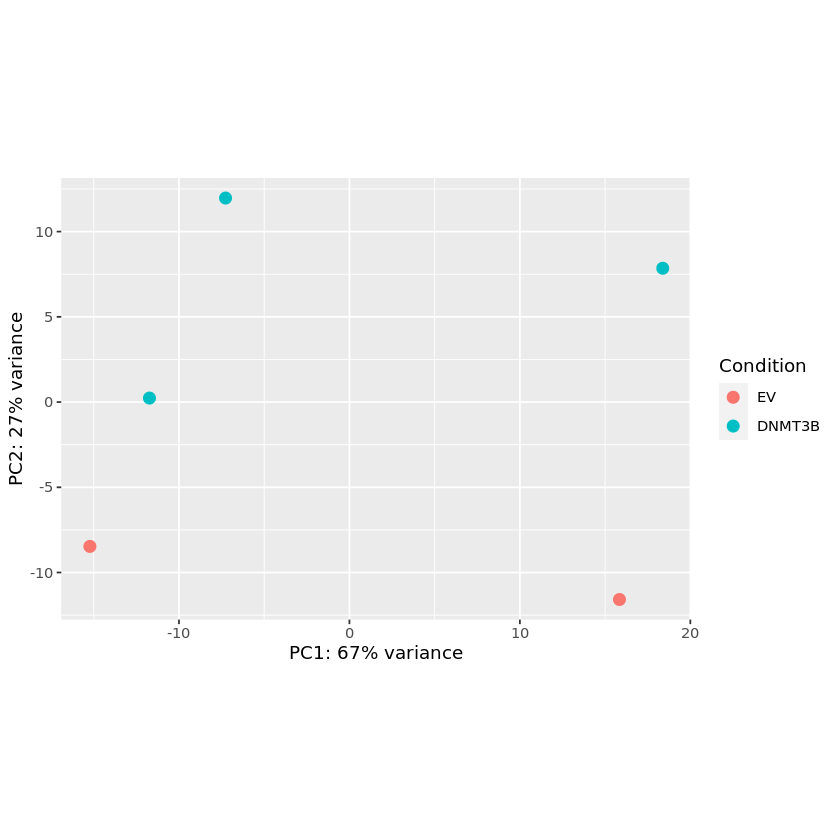

In [25]:
library('ggplot2')
pcaData <- plotPCA(vsd, intgroup=c("Condition"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
plot_fig <- ggplot(pcaData, aes(PC1, PC2, color=Condition)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()
#ggsave(plot_fig,filename = "yeast_DESeq2_PCA.pdf")
plot_fig

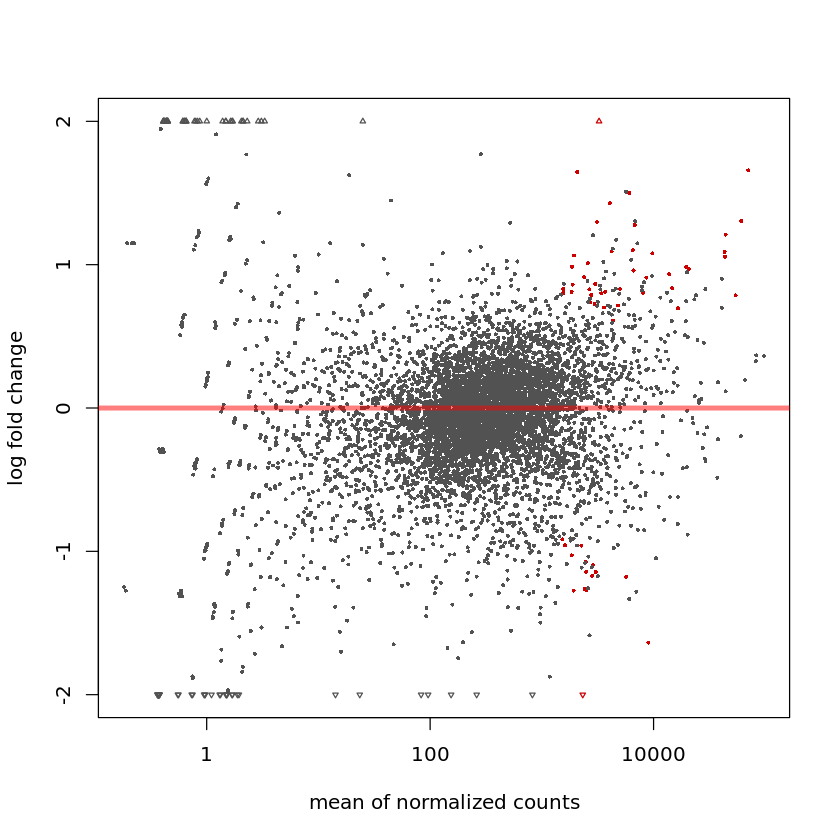

In [27]:
#pdf("yesat_DESeq2_MAplot.pdf")
plotMA(res, ylim=c(-2,2))
#dev.off()